In [1]:
from neuralplayground.arenas import Sphere
from neuralplayground.agents import Stachenfeld2018, RatInASphere
import numpy as np
from tqdm import tqdm

100%|██████████| 1000/1000 [1:52:23<00:00,  6.74s/it]     


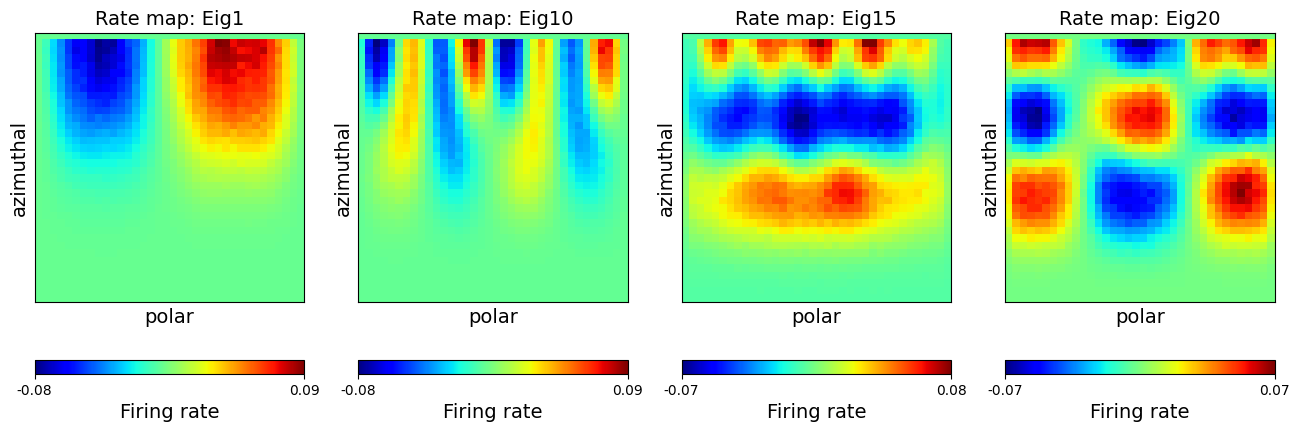

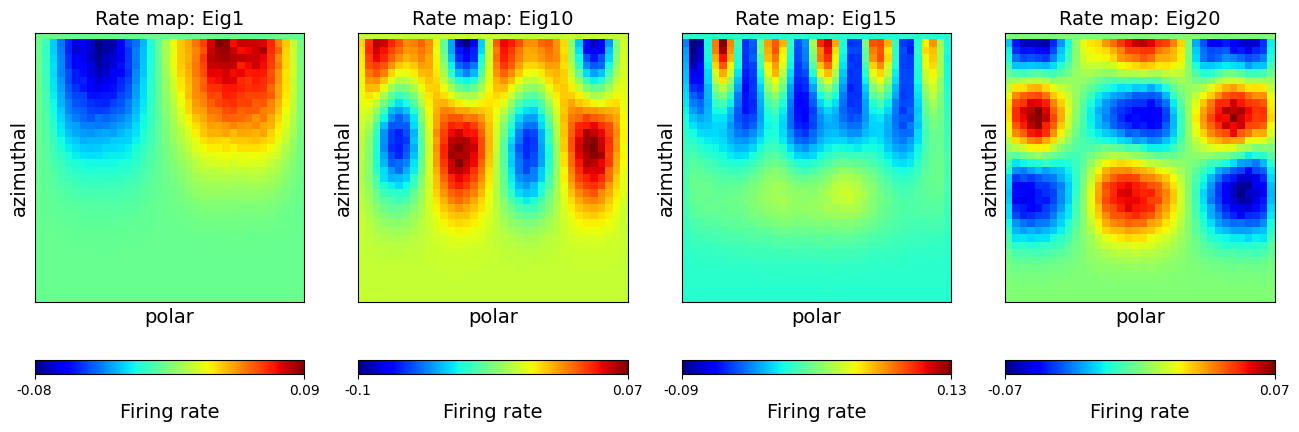

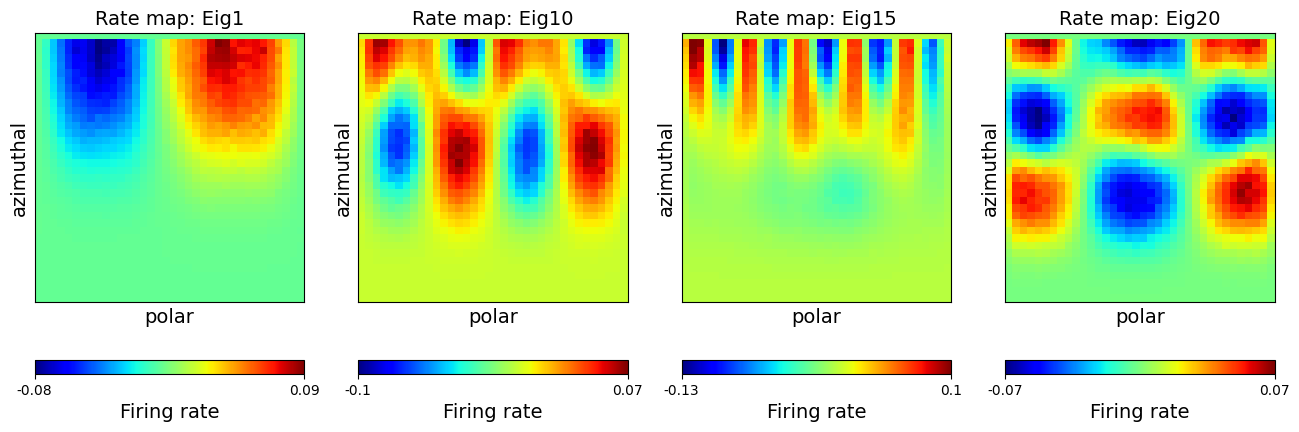

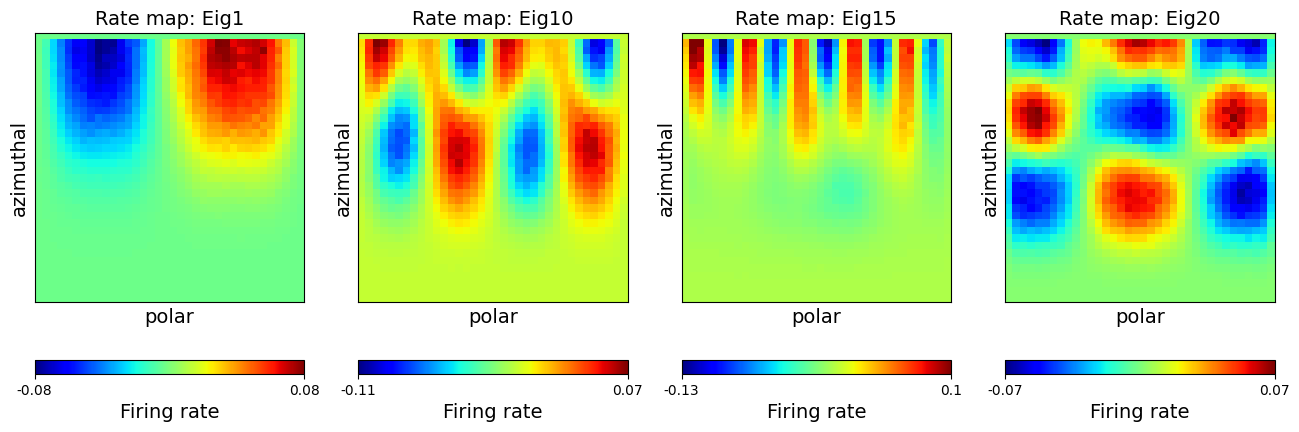

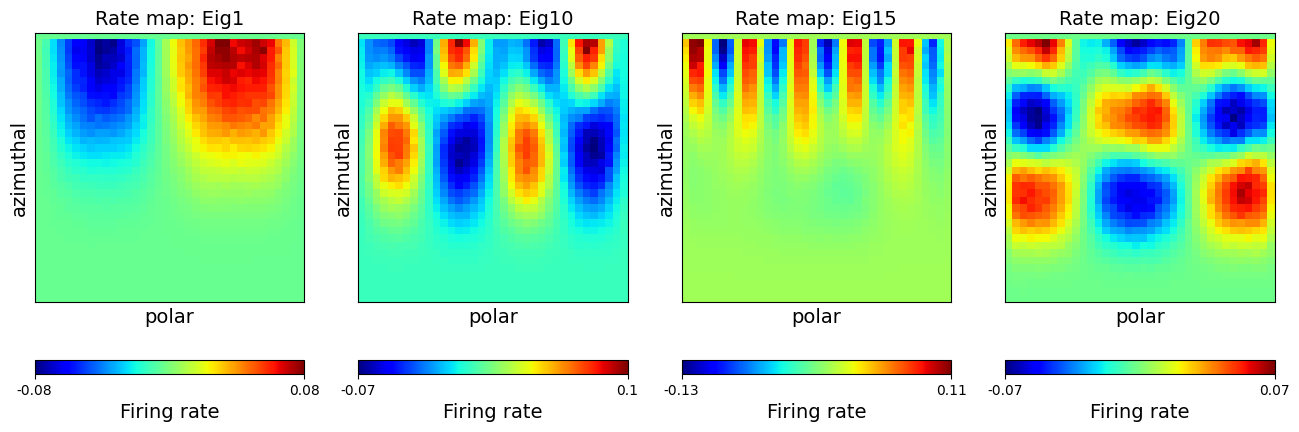

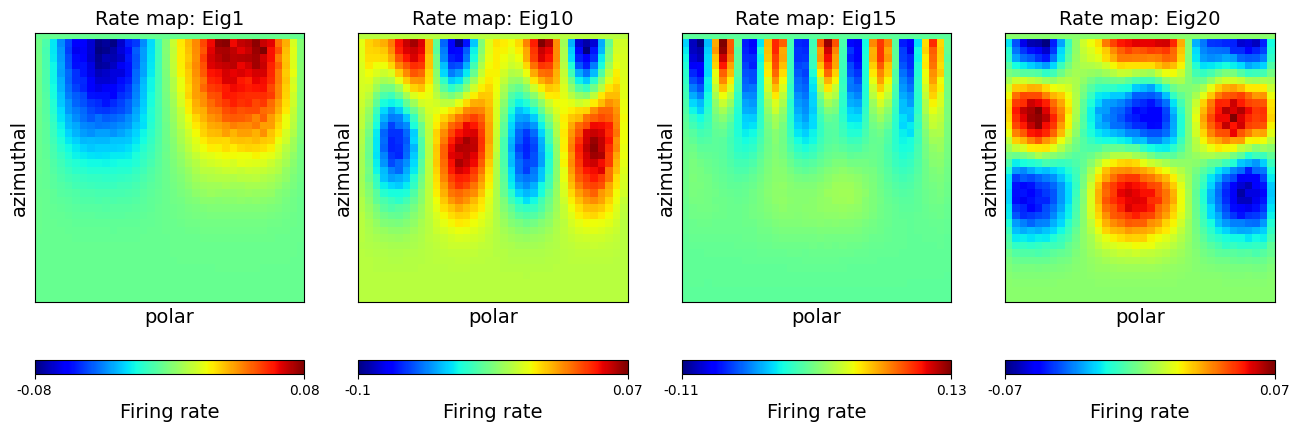

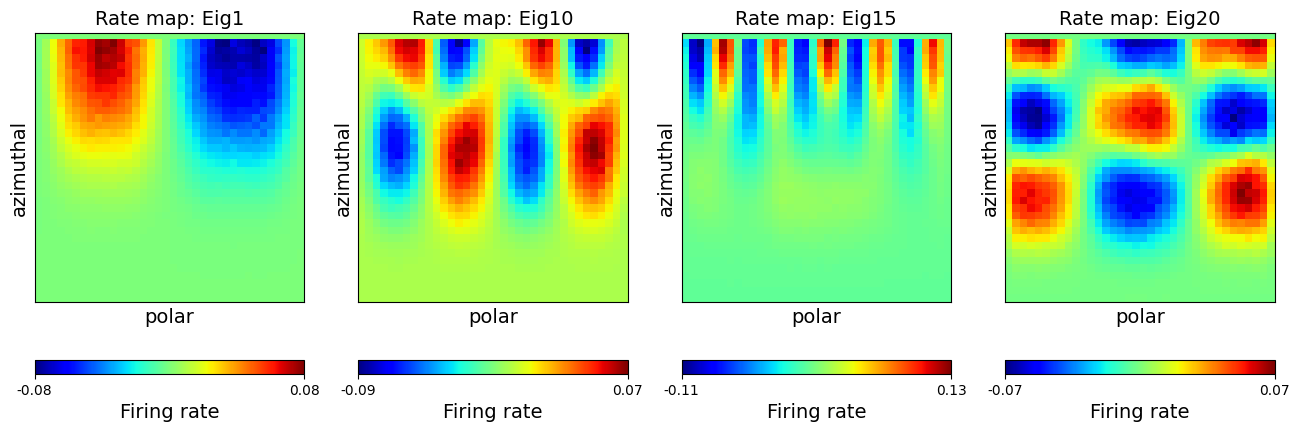

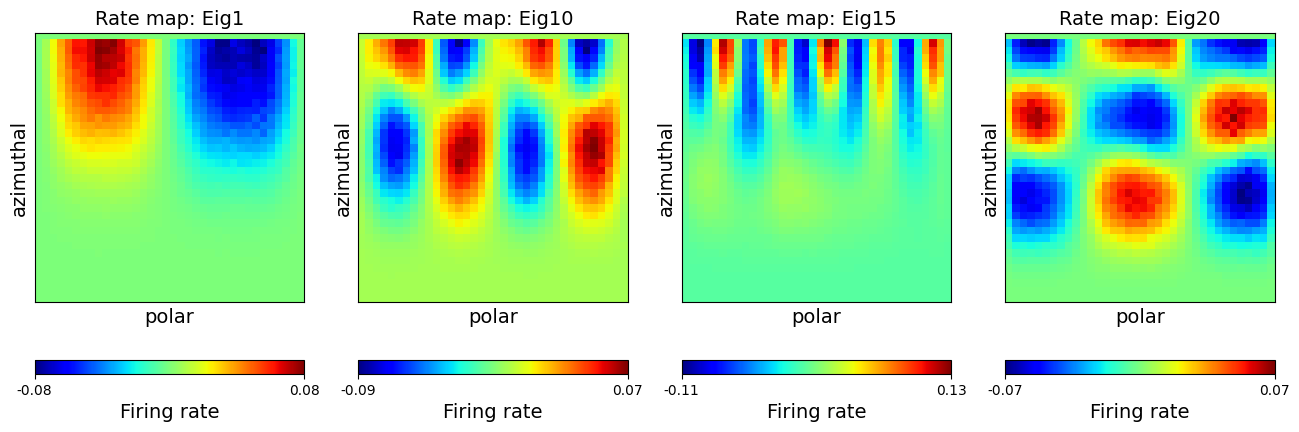

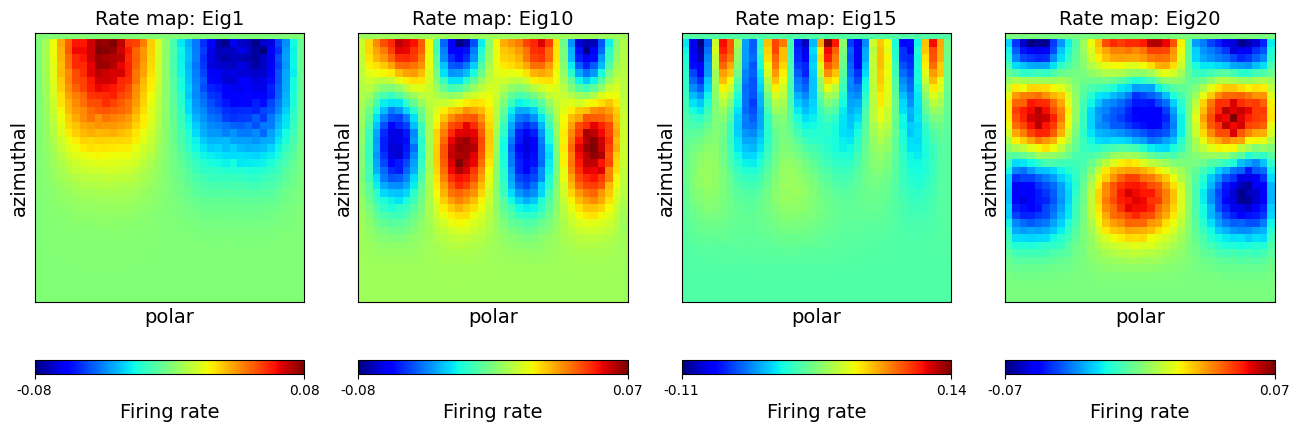

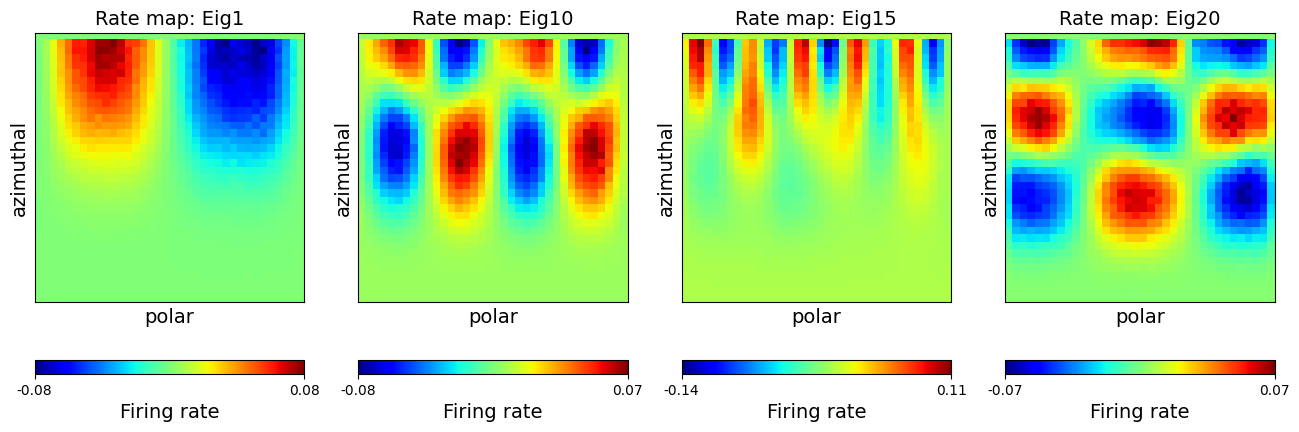

In [8]:
n_stacks, n_slices = 36, 36
n_episode = 1000
t_episode = 100
env = Sphere(n_stacks=n_stacks, n_slices=n_slices)
agent = RatInASphere(n_stacks=n_stacks, n_slices=n_slices)
plot_every = 100*100
total_iters = 0
st = set()
obs, state = env.reset()
for i in tqdm(range(n_episode)):
    for j in range(t_episode):
        action = agent.act(obs)  # the action is link to density of state to make sure we always land in a new
        agent.update()
        st.add(agent.curr_state)
        obs, state, reward = env.step(action)
        total_iters += 1
        if total_iters % plot_every == 0:
            agent.plot_rate_map(sr_matrix=agent.srmat, eigen_vectors=[1,10,15,20],save_path='./sr.png')

array([<Axes: title={'center': 'Rate map: Eig25'}, xlabel='polar', ylabel='azimuthal'>,
       <Axes: title={'center': 'Rate map: Eig27'}, xlabel='polar', ylabel='azimuthal'>,
       <Axes: title={'center': 'Rate map: Eig19'}, xlabel='polar', ylabel='azimuthal'>,
       <Axes: title={'center': 'Rate map: Eig4'}, xlabel='polar', ylabel='azimuthal'>],
      dtype=object)

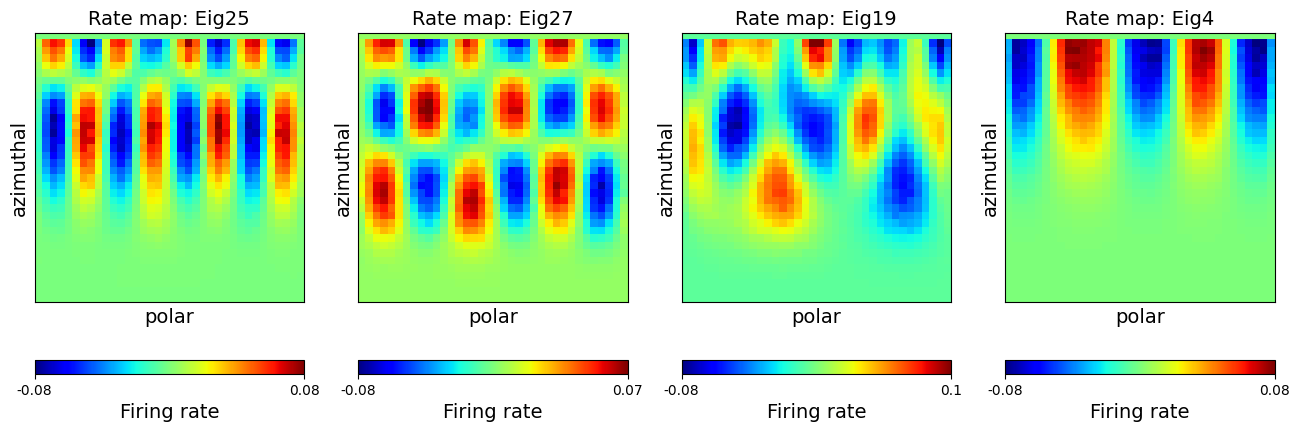

In [6]:
agent.plot_rate_map(sr_matrix=agent.srmat, eigen_vectors=[25, 27, 19, 4],save_path='./sr.png')

In [13]:
import os
current_dir = os.getcwd()
frames_dir = 'frames'
abs_frames_dir = os.path.join(current_dir, frames_dir)
if not os.path.exists(abs_frames_dir):
    os.makedirs(abs_frames_dir)
for i in range(1000):
    env.render(history_length=i+1, save_dir=os.path.join(abs_frames_dir, f'frame_{i:03d}.png'))

In [14]:
import cv2
import os

image_folder = 'frames'
video_name = 'video.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 20, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()